In [68]:
from importlib import reload

import GreedyMaxEntTag as gmet
reload(gmet)
generate_greedily_tagged_triplets = gmet.generate_greedily_tagged_triplets 

import extractFeatures as ef
reload(ef)
import pickle

In [52]:
sentence_str = 'The ancient financial executive'
model = pickle.load(open('../data/memm_model.pickle','rb'))

In [53]:
 tag_dict, feature_dict = gmet.load_map_file('../data/map_file')
registered_words, registered_tags, registered_tag_pairs = gmet.get_registered_features(feature_dict.keys())
registered_features = ef.registered_features +\
         [ef.is_word(w) for w in registered_words] + \
         [ef.prev_tag(t) for t in registered_tags] + \
         [ef.previous_2_tags(*tp) for tp in registered_tag_pairs]
    

In [54]:
len(registered_words), len(registered_features), len(registered_tags), len(registered_tag_pairs)

(203, 307, 45, 45)

In [55]:
tt = iter(generate_greedily_tagged_triplets(sentence_str, model, registered_features, feature_dict, tag_dict))

In [56]:
next(tt)

ValueError: row index exceeds matrix dimensions

In [60]:
import memm_utils
reload(memm_utils)

<module 'memm_utils' from 'C:\\Shahar\\BarIlan\\NLP-courses\\89680-NLP\\assignment1\\code\\memm_utils.py'>

In [136]:
memm_utils.check_accuracy('../data/ass1-tagger-test','../data/hmm_output')



correct: 34080 of 40117, 84.95151681332104% 


(34080, 40117)

In [110]:
memm_utils.check_accuracy('../data/ass1-tagger-test','../data/ass1-test-viterbi-out')


correct: 37098 of 40117, 92.47451205224718% 


(37098, 40117)

In [102]:
memm_utils.check_accuracy('../data/ass1-tagger-test','../data/greedy_output')


correct: 37098 of 40117, 92.47451205224718% 


(37098, 40117)

In [62]:
memm_utils.check_accuracy('../data/ass1-tagger-test','../data/greedy_output')


correct: 34431 of 40117, 85.8264576114864% 


(34431, 40117)

### final accuracy checks


In [139]:
# hmm greedy
memm_utils.check_accuracy('../data/ass1-tagger-test','../data/hmm_output')

correct: 35499 of 40117, 88.48867063838273% 


(35499, 40117)

In [140]:
#hmm viterbi
memm_utils.check_accuracy('../data/ass1-tagger-test-viterbi.txt','../data/hmm-viterbi-output')

correct: 210 of 229, 91.70305676855895% 


(210, 229)

In [141]:
# memm greedy
memm_utils.check_accuracy('../data/ass1-tagger-test','../data/greedy_output')

correct: 37097 of 40117, 92.4720193434205% 


(37097, 40117)

In [142]:
# ner hmm viterbi
memm_utils.check_accuracy('../ner/dev','../submit/hmm2/dev-tagged-shahar')

correct: 43024 of 51578, 83.41540967078987% 


(43024, 51578)

In [144]:
#ner hmm greedy
memm_utils.check_accuracy('../ner/dev','../submit/hmm2/dev-tagged-shahar-greedy')

correct: 42963 of 51578, 83.29714219240762% 


(42963, 51578)

In [65]:
[(a,b) for a in range(3) for b in range(4)]

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3)]

In [67]:
{1,2,3}.union({2,4,5})

{1, 2, 3, 4, 5}

In [74]:
ef.isnumber('345')[1]==1


True

In [138]:
np.log(0)

C:\ProgramData\Anaconda3\envs\bari_env\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


-inf

In [75]:
list((1,2,3))

[1, 2, 3]

In [81]:
import scipy.sparse as sp
import numpy as np

In [82]:
a =sp.lil_matrix(np.zeros((5,5)))


In [84]:
a[4,4]=8
a[2,0]=6


In [85]:
sp.find(a)

(array([2, 4], dtype=int32), array([0, 4], dtype=int32), array([6., 8.]))

In [87]:
i,j,v = sp.find(a)
for k in range(len(i)):
    print(f'{i[k]} , {j[k]}, {v[k]}')

2 , 0, 6.0
4 , 4, 8.0


In [88]:
a[3,3]

0.0

In [91]:
np.min(np.array([[1,1,1],[2,2,2],[3,3,3]]),axis=1)

array([1, 2, 3])

In [100]:
list(range(5,1,-1))

[5, 4, 3, 2]

In [104]:
a = set()
a.add(5)
a

{5}

In [107]:
a =zip([1,2,4],[5,6,8])
["/".join(t) for t in a]

TypeError: sequence item 0: expected str instance, int found

In [111]:
import pickle

In [112]:
tmodel = pickle.load(open('../data/memm_model.pickle','rb'))

In [114]:
import matplotlib.pyplot as plt
tmodel.coef_

array([[-4.14090996e+00,  9.39164427e-01,  8.70565202e-01, ...,
        -1.70622418e-03, -1.75691477e-03, -5.13944441e-03],
       [-9.11698688e-01,  5.57130000e-01, -8.40802607e-01, ...,
        -2.90743440e-03, -7.64633345e-05, -1.44431744e-05],
       [ 9.86129385e+00, -5.32398976e-01,  7.06482058e-01, ...,
         2.43440904e-02,  4.77251267e-03, -1.19080664e-05],
       ...,
       [ 2.21049325e-01, -1.79085752e+00, -1.37032365e+00, ...,
        -7.13577854e-06, -9.73896632e-05, -3.45592748e-05],
       [-4.21225647e+00, -2.78289159e-01, -8.17523405e-01, ...,
        -1.06947186e-06, -1.85266733e-07, -1.48944108e-05],
       [-3.19931126e+00, -1.17853614e+00, -1.31138100e+00, ...,
        -3.35487859e-07, -2.85597645e-06, -3.71233734e-06]])

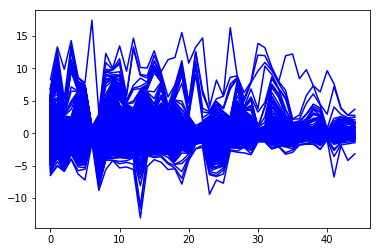

In [121]:
%matplotlib inline
plt.plot(np.sort(tmodel.coef_),'b-')
plt.show()

In [122]:
tmodel.coef_.shape

(45, 26012)

KeyboardInterrupt: 

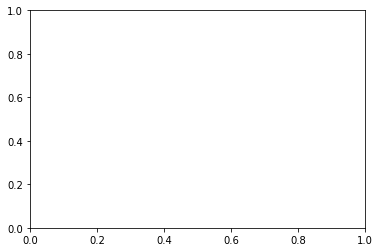

In [123]:
plt.hist(tmodel.coef_[1:,])
plt.show()

In [124]:
from collections import defaultdict

In [128]:
a = defaultdict(lambda: 5)


In [129]:
a[4] = 6
a[4]

6

In [130]:
a[3]

5

In [131]:
3 in a

True

In [132]:
4 in a

True

In [133]:
32432 in a


False